In [1]:
# !pip install numpy

Попробуй посчитать количество пиков и их координату х.

Разница между файлами - где smooth - нет шумов, файл просто PET более приближен к реальному эксперименту

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain

In [4]:
pet_smooth = pd.read_csv('data/PET(smooth).csv')

In [5]:
pet_smooth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Raman shift [1/cm]  1020 non-null   float64
 1   Intensity           1020 non-null   float64
dtypes: float64(2)
memory usage: 16.1 KB


In [6]:
pet_smooth.drop_duplicates()

,Raman shift [1/cm],Intensity
0,1899.610,14.982459
1,1898.139,16.454247
2,1896.668,15.135531
3,1895.197,15.612789
4,1893.726,13.601376
...,...,...
1015,406.443,123.188000
1016,404.972,125.163150
1017,403.501,125.909660
1018,402.030,126.545460


## Show

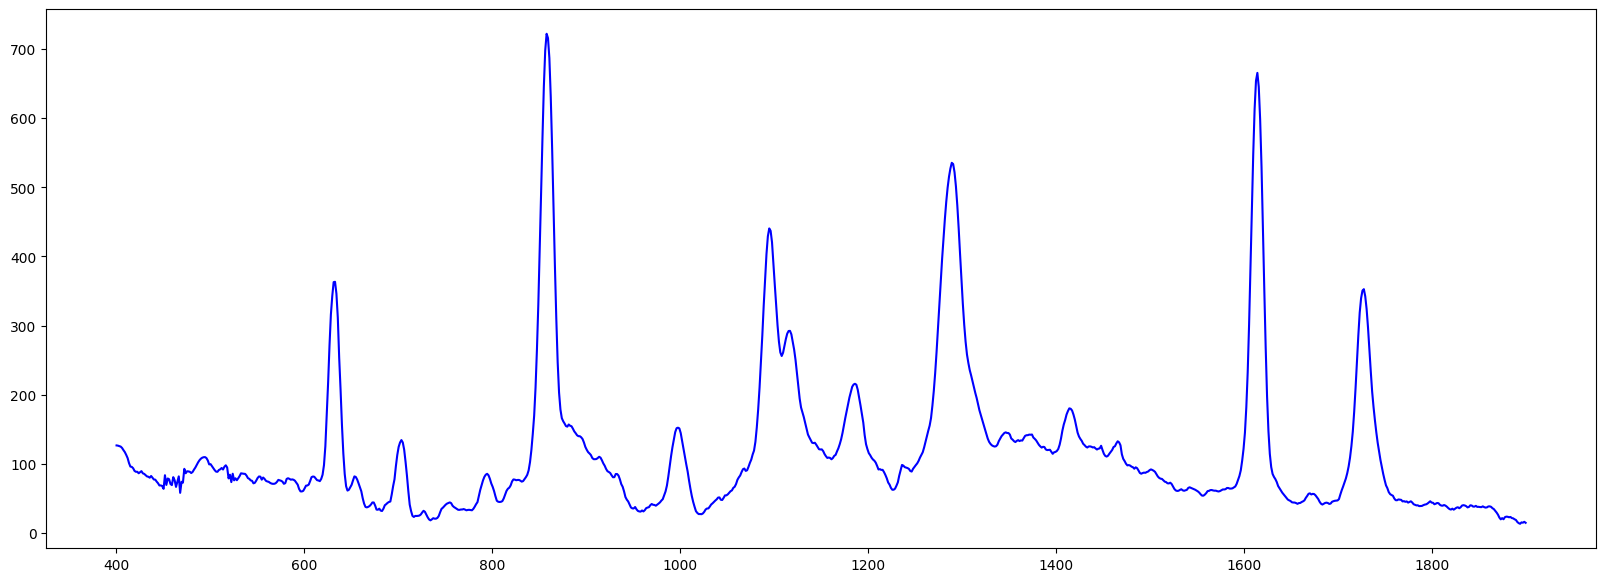

In [7]:
x = pet_smooth['Raman shift [1/cm]']

plt.figure(figsize=(20, 7))
plt.autoscale()
plt.plot(x, pet_smooth['Intensity'], label='signal', c='b')

In [8]:
intensity = np.array(pet_smooth['Intensity'].tolist())

In [9]:
intensity

array([ 14.982459,  16.454247,  15.135531, ..., 125.90966 , 126.54546 ,
       126.86021 ])

In [10]:
pet_smooth = pet_smooth.reset_index(drop=True)

## Savitzky-Golay filter 

In [12]:
# !pip install scipy

In [70]:
from scipy.signal import savgol_filter

In [83]:
pet_smooth['Intensity_filtered'] = savgol_filter(pet_smooth['Intensity'].tolist(), 10, 1)

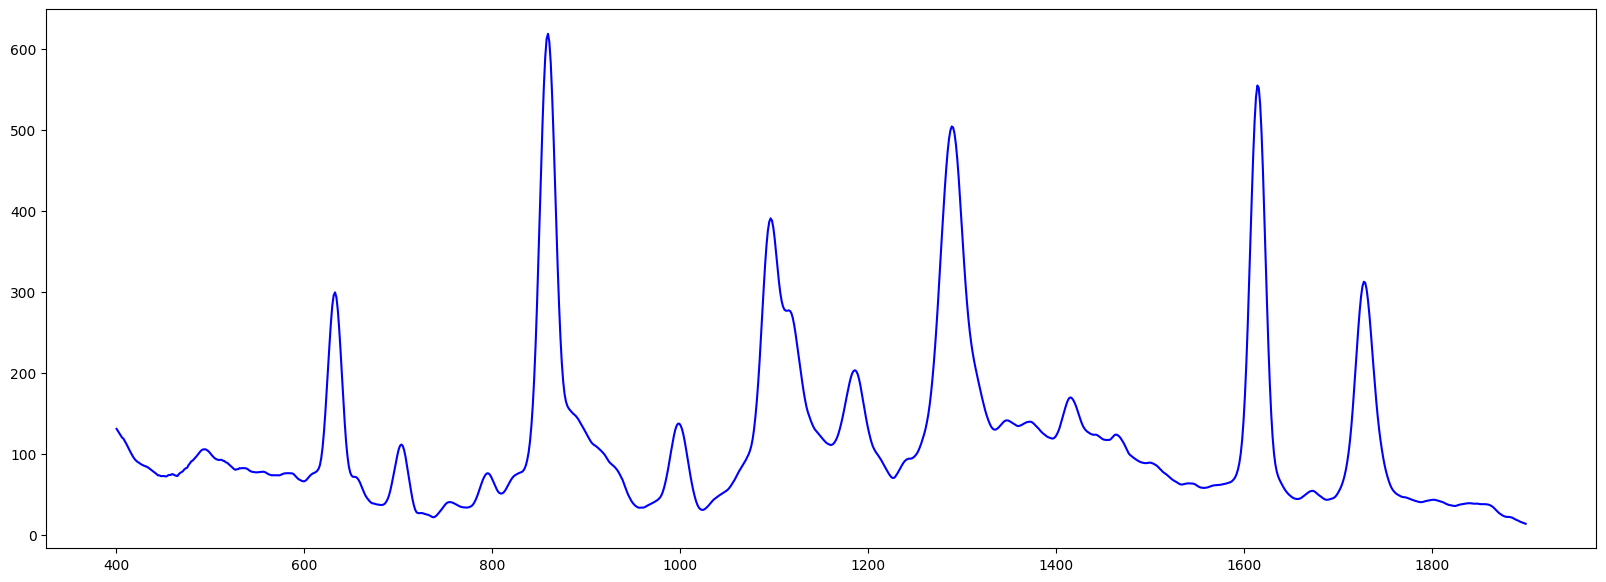

In [84]:
x = pet_smooth['Raman shift [1/cm]']

plt.figure(figsize=(20, 7))
plt.autoscale()
plt.plot(x, pet_smooth['Intensity_filtered'], label='signal', c='b')

## Peaks Analys

In [85]:
from scipy.signal import find_peaks

In [86]:
# data_intensity = pet_smooth['Intensity_filtered'].tolist()

In [87]:
data_intensit_y = np.stack(pet_smooth['Intensity_filtered'])
data_shift_x = np.stack(pet_smooth['Raman shift [1/cm]'])

In [88]:
peaks = find_peaks(data_intensity)[0]

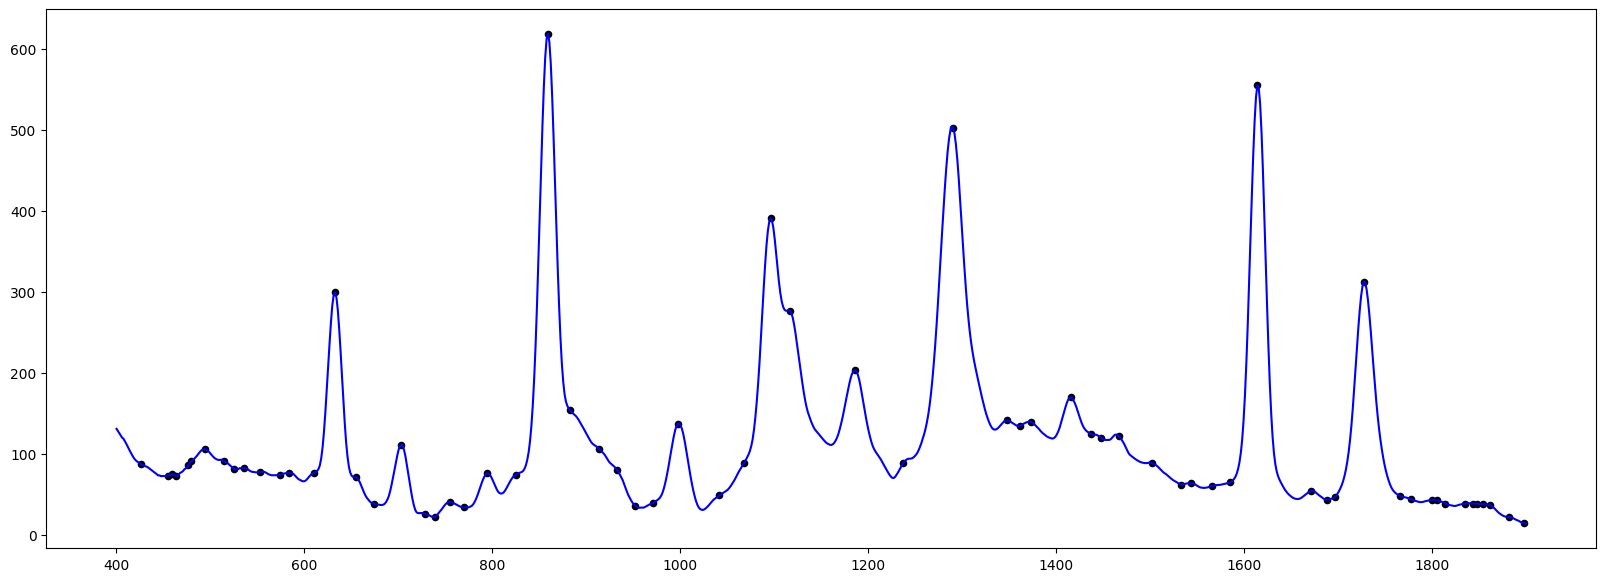

In [89]:
plt.figure(figsize=(20, 7))
plt.autoscale()
plt.plot(data_shift_x, data_intensit_y, label='signal', c='b')
for x, y in zip(data_shift_x[peaks], data_intensit_y[peaks]):
    plt.scatter(x, y, c='black', s=20)

In [90]:
minimum = data_intensit_y.min()

In [91]:
maximum = data_intensit_y.min()

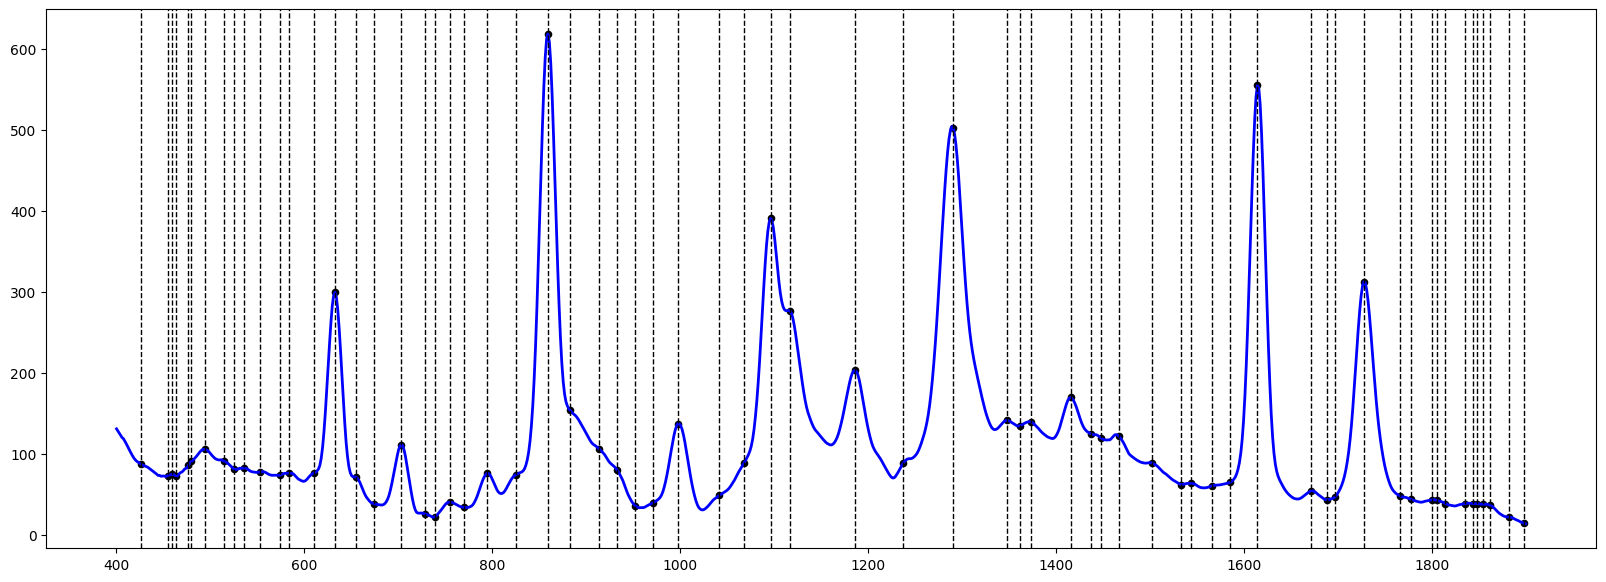

In [92]:
plt.figure(figsize=(20, 7))
plt.autoscale()
plt.plot(data_shift_x, data_intensit_y, label='signal', c='b', linewidth=2)
for x, y in zip(data_shift_x[peaks], data_intensit_y[peaks]):
    plt.scatter(x, y, c='black', s=20)
    plt.axvline(x, color='black', ymin=0, linestyle='--', linewidth=1)

### Tuned Peaks

In [93]:
peaks = find_peaks(data_intensity, height=100)[0]

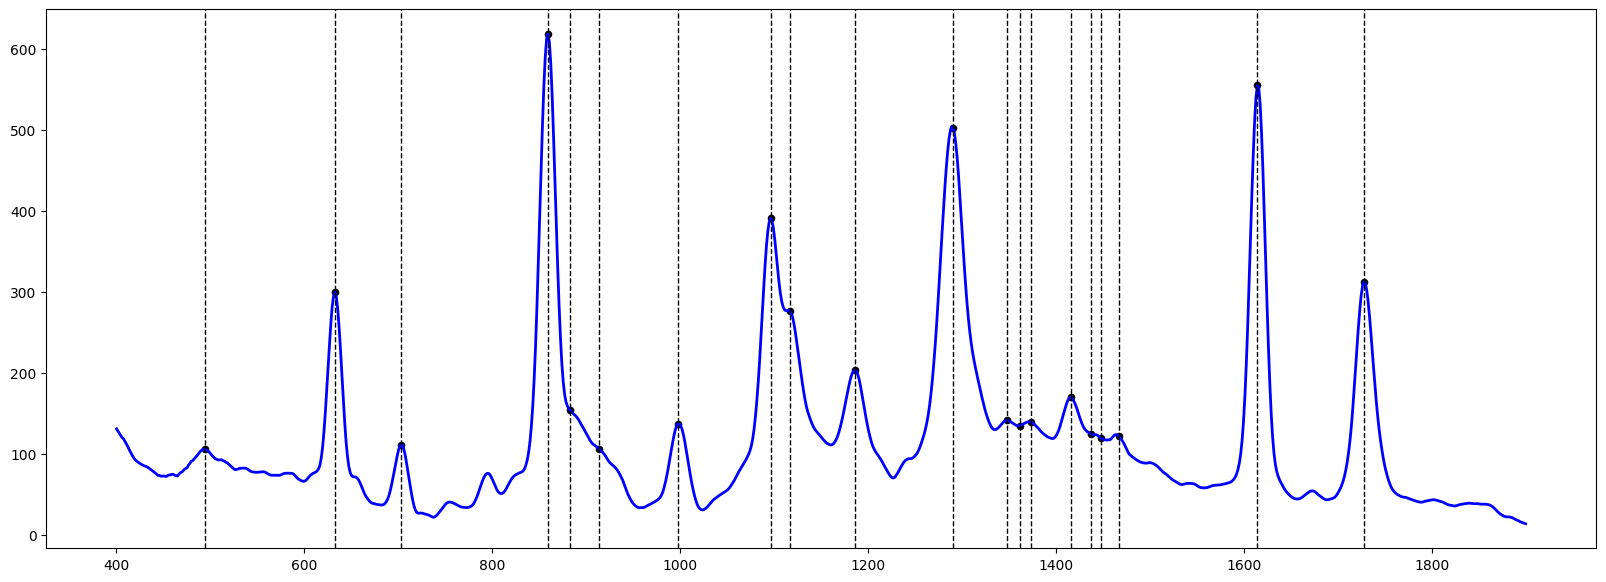

In [94]:
plt.figure(figsize=(20, 7))
plt.autoscale()
plt.plot(data_shift_x, data_intensit_y, label='signal', c='b', linewidth=2)
for x, y in zip(data_shift_x[peaks], data_intensit_y[peaks]):
    plt.scatter(x, y, c='black', s=20)
    plt.axvline(x, color='black', ymin=0, linestyle='--', linewidth=1)